In [1]:
# !pip install opencv-python

In [2]:
# 导入opencv时，用cv2
import cv2

# 1 opencv介绍

In [3]:
# opencv采用C++变量命名规则，前一个单词首字母小写，后一个单词首字母大写

## 2.1 展示和创建窗口

In [4]:
# nameWindow() 创建命名窗口
# cv2.WINDOW_AUTOSIZE不允许修改窗口大小
cv2.namedWindow('MyWindow', cv2.WINDOW_NORMAL)

# 更改窗口大小
cv2.resizeWindow('MyWindow', 800, 600)

# 展示名字为MyWindow的窗口
cv2.imshow('MyWindow',0)

# 使用waitKey()方法关闭窗口
# 等待按键
# 括号内数字为延迟时间，单位为毫秒
key = cv2.waitKey(0)
if key == ord('q'):
    print('准备销毁窗口')
    cv2.destroyAllWindows()

## 2.2 加载显示图片

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# imread(path, flag), 默认加载彩色图片。flag为读取图片的方式
cat = cv2.imread('figure_01.png')

# numpy的ndarray
cat

array([[[237, 238, 239],
        [237, 238, 238],
        [238, 238, 238],
        ...,
        [168, 167, 162],
        [227, 226, 220],
        [251, 250, 241]],

       [[236, 238, 239],
        [238, 238, 239],
        [238, 238, 238],
        ...,
        [168, 167, 162],
        [227, 226, 219],
        [251, 250, 240]],

       [[236, 237, 239],
        [237, 238, 238],
        [238, 238, 238],
        ...,
        [168, 167, 162],
        [228, 226, 219],
        [252, 250, 239]],

       ...,

       [[ 98,  98,  97],
        [ 97,  98,  97],
        [ 97,  98,  97],
        ...,
        [ 76,  74,  67],
        [105, 103,  93],
        [105, 101,  87]],

       [[ 98,  98,  98],
        [ 98,  98,  97],
        [ 98,  98,  97],
        ...,
        [ 76,  74,  67],
        [105, 103,  92],
        [105, 101,  87]],

       [[ 96,  94,  91],
        [ 95,  94,  91],
        [ 95,  94,  90],
        ...,
        [ 76,  74,  66],
        [104, 102,  91],
        [103, 100,  86]]

In [23]:
print("type_cat", type(cat))
print("cat.shape", cat.shape)

type_cat <class 'numpy.ndarray'>
cat.shape (1212, 1244, 3)


In [31]:
print("cat[500][500]", type(cat[500][500]))
print("cat[500][500][1]", type(cat[500][500][1]))
print("cat[500][500][1]", cat[500][500])

cat[500][500] <class 'numpy.ndarray'>
cat[500][500][1] <class 'numpy.uint8'>
cat[500][500][1] [255 255 255]


In [33]:
# numpy的ndarray
np.savetxt('out1.txt', cat[100],fmt="%d")
np.savetxt('out2.txt', cat[110],fmt="%d")
np.savetxt('out3.txt', cat[120],fmt="%d")
np.savetxt('out4.txt', cat[130],fmt="%d")
np.savetxt('out5.txt', cat[140],fmt="%d")

np.savetxt('out6.txt', cat[500],fmt="%d")

In [6]:
cat.max()

255

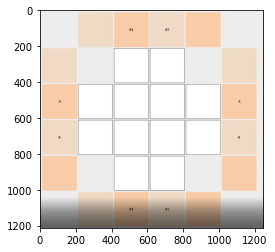

In [7]:
plt.imshow(cat)

# matplotlib显示的图片与真实图片有色差
# 原因是opencv都进来的图片数据通道不是默认的红-绿-蓝（RGB），而是蓝-绿-红（BGR）
# 所以,openCV读进来的图片，不要用其他方式展示（比如matplotlib）
# 要用openCV自带的工具进行展示

In [8]:
cv2.imshow('cat', cat)
key = cv2.waitKey(0)
if key == ord('q'):                                                                                                                                                                                                                                                                                                                                     
    print('准备销毁窗口')
    cv2.destroyAllWindows()

In [10]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img_path = 'figure_01.png'

img = cv2.imread(img_path)
edges = cv2.Canny(img, 30, 80)

cv2.imshow('edges', edges)
key = cv2.waitKey(0)
if key == ord('q'):                                                                                                                                                                                                                                                                                                                                     
    print('准备销毁窗口')
    cv2.destroyAllWindows()

In [11]:
image_path = "保存图片.jpg"
cv2.imwrite(image_path, edges)

True

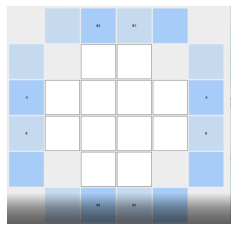

553


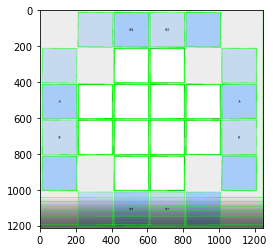

In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img_path = 'figure_01.png'

def angle_cos(p0, p1, p2):
    import numpy as np

    d1, d2 = (p0-p1).astype('float'), (p2-p1).astype('float')
    return abs( np.dot(d1, d2) / np.sqrt( np.dot(d1, d1)*np.dot(d2, d2) ) )

def find_squares(img):
    import cv2 as cv
    import numpy as np

    # cv.GaussianBlur(InputArray src, OutputArray dst, Size ksize, double sigmaX, double sigmaY=0, int borderType=BORDER_DEFAULT)
    # src: 源图像
    # dst：目标图像
    # ksize：高斯核的尺寸
    # sigmaX, sigmaY：高斯核的标准差
    # 使用高斯滤波进行降噪
    img = cv.GaussianBlur(img, (5, 5), 0)
    squares = []
    for gray in cv.split(img):
        for thrs in range(0, 255, 26):
            if thrs == 0:
                bin = cv.Canny(gray, 0, 70, apertureSize=3)
                # bin = cv.dilate(bin, None)
            else:
                _retval, bin = cv.threshold(gray, thrs, 255, cv.THRESH_BINARY)
            contours, _hierarchy = cv.findContours(bin, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
            for cnt in contours:
                cnt_len = cv.arcLength(cnt, True)
                cnt = cv.approxPolyDP(cnt, 0.02*cnt_len, True)
                if len(cnt) == 4 and cv.contourArea(cnt) > 1000 and cv.isContourConvex(cnt):
                    cnt = cnt.reshape(-1, 2)
                    max_cos = np.max([angle_cos( cnt[i], cnt[(i+1) % 4], cnt[(i+2) % 4] ) for i in range(4)])
                    if max_cos < 0.1:
                        squares.append(cnt)
    print(len(squares))
    return squares

img = cv2.imread(img_path,1)

plt.axis("off")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

squares = find_squares(img)
cv2.drawContours( img, squares, -1, (0, 255, 0), 1 )
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [34]:
color_dist = {
    'color_01': {'Lower': np.array([236, 236, 236]), 'Upper': np.array([238, 238, 238])},
    'color_02': {'Lower': np.array([238, 217, 196]), 'Upper': np.array([240, 219, 198])},
    'color_03': {'Lower': np.array([247, 203, 166]), 'Upper': np.array([249, 205, 168])},
    'color_04': {'Lower': np.array([254, 254, 254]), 'Upper': np.array([255, 255, 255])},
}